In [1]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import requests
import matplotlib.pyplot as plt

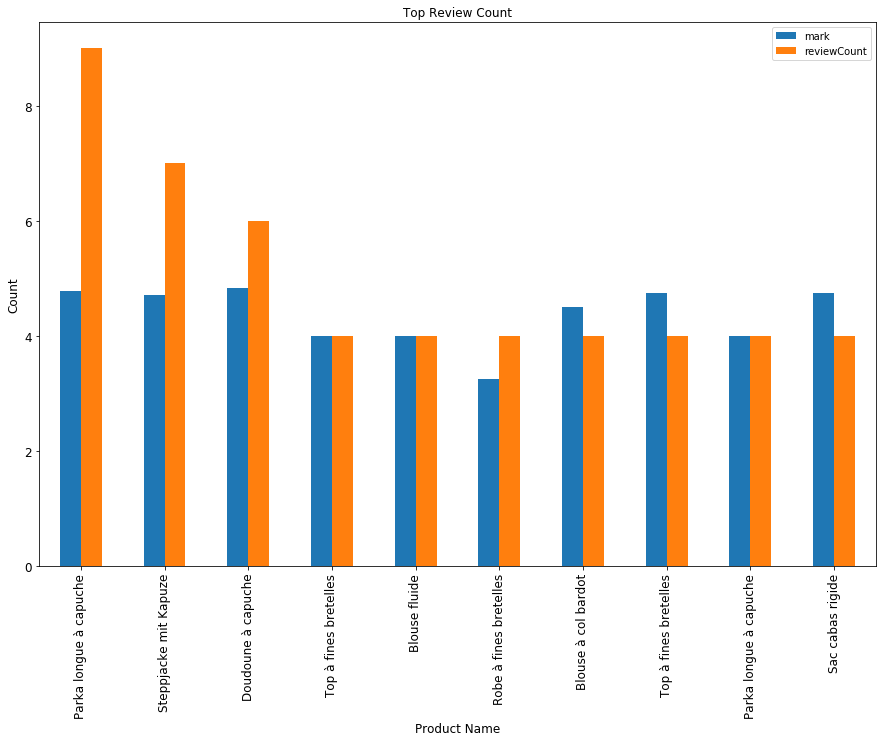

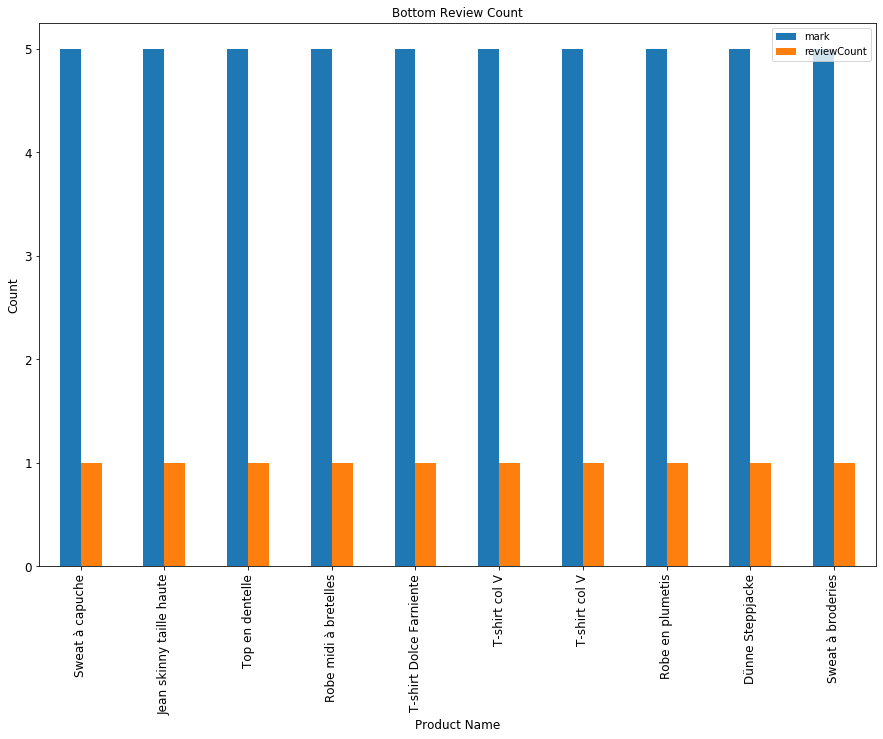

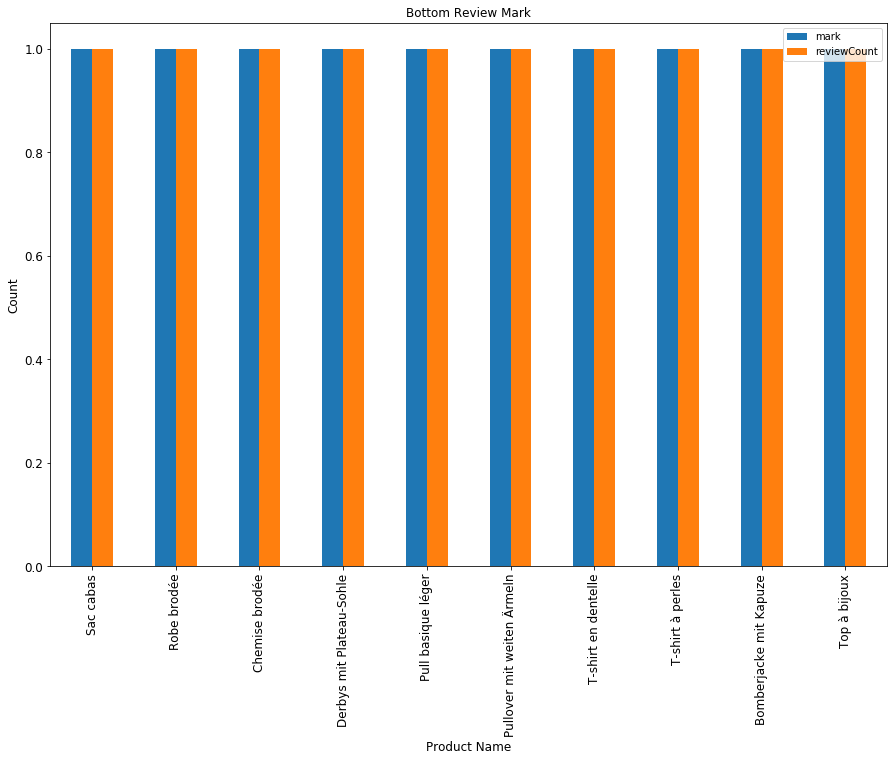

In [2]:
def top10ReviewCounts(result):
    top10ReviewCounts = result.nlargest(10, 'reviewCount')
    ax = top10ReviewCounts.plot(kind='bar', x= 'name', title ="Top Review Count", figsize=(15, 10), legend=True, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xlabel("Product Name", fontsize=12)
    plt.show()

    
def bottom10ReviewCounts(result):    
    bottom10ReviewCounts = result.nsmallest(10, 'reviewCount')
    ax = bottom10ReviewCounts.plot(kind='bar', x= 'name', title ="Bottom Review Count", figsize=(15, 10), legend=True, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xlabel("Product Name", fontsize=12)
    plt.show()
            
def bottom10Reviews(result):    
    bottom10Reviews = result.nsmallest(10, 'mark')
    ax = bottom10Reviews.plot(kind='bar', x= 'name', title ="Bottom Review Mark", figsize=(15, 10), legend=True, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xlabel("Product Name", fontsize=12)
    plt.show()
    
    
def main():
    
    # change here the tsid of the shop.
    tsid = 'XD813C5EF87588AEFB229C281B8F5E780'
    
    # API request for Product Reviews
    url = 'https://cdn1.api.trustedshops.com/shops/' + tsid + '/products/public/v1/feed.json'
    headers =  { 'Accept':  'application/json' }
    response = requests.get(url, headers = headers)
    json_data = json.loads(response.text)

    # extract json data into pandas dataframe
    reviews = json_data['response']['data']['shop']['products']
    result = json_normalize(reviews)
    
    # delete not used columns from dataframe
    if 'brand' in result:
        result = result.drop('brand', 1)
    if 'gtin' in result:
        result = result.drop('gtin', 1)
    if 'imageUrl' in result:
        result = result.drop('imageUrl', 1)
    if 'mpn' in result:
        result = result.drop('mpn', 1)
    
    # rename the columns
    result.columns = ['name', 'reviews', 'url', 'mark', 'markDescription', 'reviewCount', 'sku', 'uuid']
    
    # create chart for top 10 review counts
    top10ReviewCounts(result)
    
    # create chart for bottom 10 review counts
    bottom10ReviewCounts(result)
    
    # create chart for bottom 10 review marks
    bottom10Reviews(result)
    
    
if __name__ == '__main__':
    main()
    